# Analyze a dataset about the westbound traffic on the I-94 Interstate highway

The goal of our analysis is to determine a few indicators of heavy traffic on I-94. These indicators can be weather type, time of the day, time of the week, etc. For instance, we may find out that the traffic is usually heavier in the summer or when it snows.

## Step1

In [1]:
import pandas as pd
traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [2]:
traffic.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


## Step2

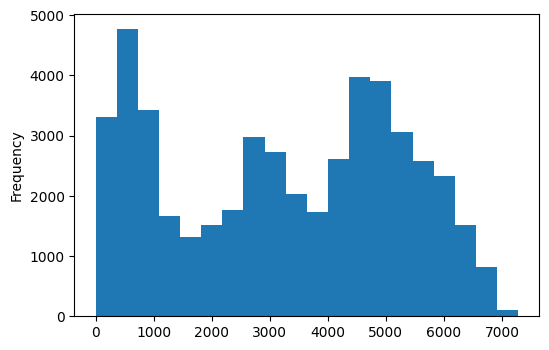

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

traffic['traffic_volume'].plot.hist(bins=20)

In [4]:
traffic['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

### Observation
The peak is around 4000 - 5000. We need to focus on the data above 1000.

## Step3
We'll start by dividing the dataset into two parts:
- Daytime data: hours from 7 a.m. to 7 p.m. (12 hours)
- Nighttime data: hours from 7 p.m. to 7 a.m. (12 hours)

In [5]:
traffic['date_time'] = pd.to_datetime(traffic['date_time'])
day = traffic[(traffic['date_time'].dt.hour >= 7) & 
                          (traffic['date_time'].dt.hour < 19)]
night = traffic[(traffic['date_time'].dt.hour < 7) | 
                            (traffic['date_time'].dt.hour >= 19)]

## Step4
Now we're going to compare the traffic volume at night and during day.

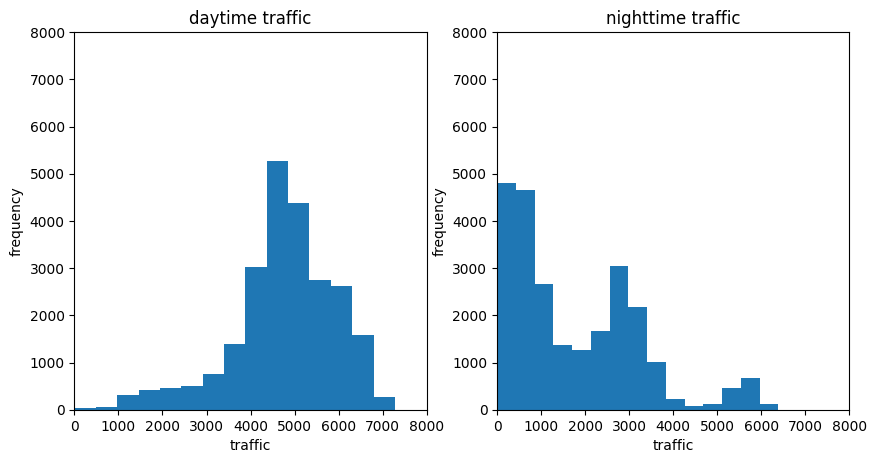

In [6]:
plt.figure(figsize=[10,5])

plt.subplot(1,2,1)
plt.hist(day['traffic_volume'], bins=15)
plt.title('daytime traffic')
plt.xlabel('traffic')
plt.ylabel('frequency')
plt.xlim([0,8000])
plt.ylim([0,8000])

plt.subplot(1,2,2)
plt.hist(night['traffic_volume'], bins=15)
plt.title('nighttime traffic')
plt.xlabel('traffic')
plt.ylabel('frequency')
plt.xlim([0,8000])
plt.ylim([0,8000])

plt.show()

## Step5 & 6
We're going to look at a few line plots showing how the traffic volume changed according to the following parameters:

- Month
- Day of the week
- Time of day

In [8]:
day['month'] = day['date_time'].dt.month
by_month = day.groupby('month').mean()
by_month['traffic_volume']

<ipython-input-8-b104fbd4ed31>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



month
1.0     4495.613727
2.0     4711.198394
3.0     4889.409560
4.0     4906.894305
5.0     4911.121609
6.0     4898.019566
7.0     4595.035744
8.0     4928.302035
9.0     4870.783145
10.0    4921.234922
11.0    4704.094319
12.0    4374.834566
Name: traffic_volume, dtype: float64

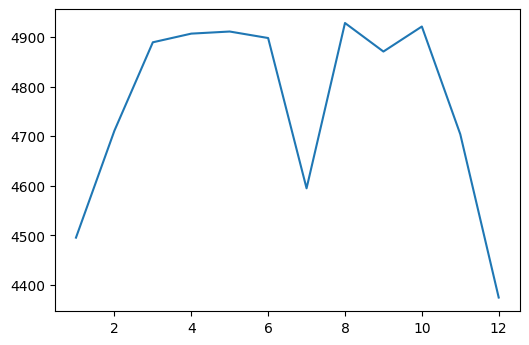

In [9]:
plt.plot(by_month['traffic_volume'])

In [10]:
day['dayofweek'] = day['date_time'].dt.dayofweek
by_dayofweek = day.groupby('dayofweek').mean()
by_dayofweek['traffic_volume']  # 0 is Monday, 6 is Sunday

<ipython-input-10-e4e897828b56>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



dayofweek
0.0    4893.551286
1.0    5189.004782
2.0    5284.454282
3.0    5311.303730
4.0    5291.600829
5.0    3927.249558
6.0    3436.541789
Name: traffic_volume, dtype: float64

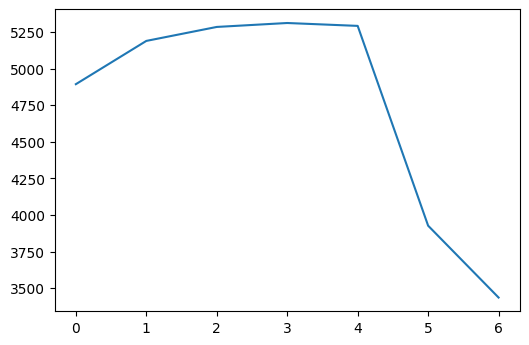

In [11]:
plt.plot(by_dayofweek['traffic_volume'])

## Step7
We'll now generate a line plot for the time of day. The weekends, however, will drag down the average values, so we're going to look at the averages separately. To do that, we'll start by splitting the data based on the day type: business day or weekend.

In [12]:
day['hour'] = day['date_time'].dt.hour
bussiness_days = day.copy()[day['dayofweek'] <= 4] # 4 == Friday
weekend = day.copy()[day['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
7.0     6030.413559
8.0     5503.497970
9.0     4895.269257
10.0    4378.419118
11.0    4633.419470
12.0    4855.382143
13.0    4859.180473
14.0    5152.995778
15.0    5592.897768
16.0    6189.473647
17.0    5784.827133
18.0    4434.209431
Name: traffic_volume, dtype: float64
hour
7.0     1589.365894
8.0     2338.578073
9.0     3111.623917
10.0    3686.632302
11.0    4044.154955
12.0    4372.482883
13.0    4362.296564
14.0    4358.543796
15.0    4342.456881
16.0    4339.693805
17.0    4151.919929
18.0    3811.792279
Name: traffic_volume, dtype: float64


<ipython-input-12-4244afafd4b2>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



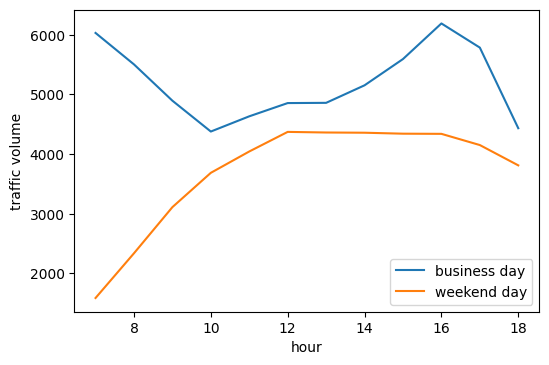

In [17]:
plt.plot(by_hour_business['traffic_volume'], label='business day')
plt.plot(by_hour_weekend['traffic_volume'], label='weekend day')
plt.xlabel('hour')
plt.ylabel('traffic volume')
plt.legend()
plt.show()

### Findings
- On business days, peaktime is morning and evening.
- On weekend days, peaktime is afternoon.
- Business days have heavier traffic volume than weekend days.

## Step8
Another possible indicator of heavy traffic is weather. The dataset provides us with a few useful columns about weather: temp, rain_1h, snow_1h, clouds_all, weather_main, weather_description.

A few of these columns are numerical so let's start by looking up their correlation values with traffic_volume.

In [29]:
day.corr()['traffic_volume'].iloc[0:4]

temp          0.128317
rain_1h       0.003697
snow_1h       0.001265
clouds_all   -0.032932
Name: traffic_volume, dtype: float64

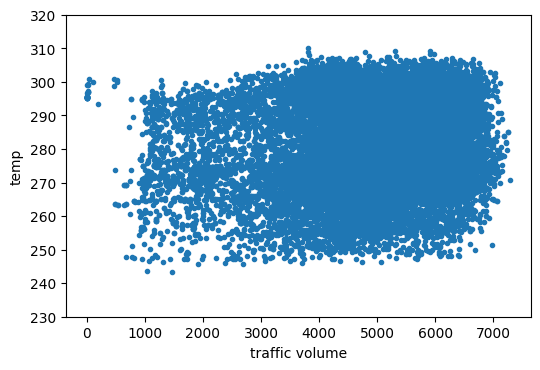

In [37]:
plt.scatter(day['traffic_volume'], day['temp'], marker='.')
plt.xlabel('traffic volume')
plt.ylabel('temp')
plt.ylim([230,320])
plt.show()

## Step9


In [39]:
by_weather_main = day.groupby('weather_main').mean()
by_weather_description = day.groupby('weather_description').mean()

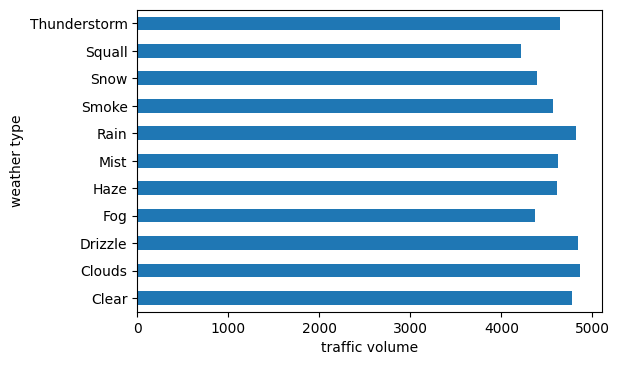

In [57]:
by_weather_main['traffic_volume'].plot.barh()
plt.xlabel('traffic volume')
plt.ylabel('weather type')
plt.show()
# plt.barh(y=by_weather_main.index, width=by_weather_main['traffic_volume'])

### Observation
- Is there any traffic volume exceeding 5,000 cars?
    - No
- Can you find any weather type as a heavy traffic indicator?
    - There is no strong indication.

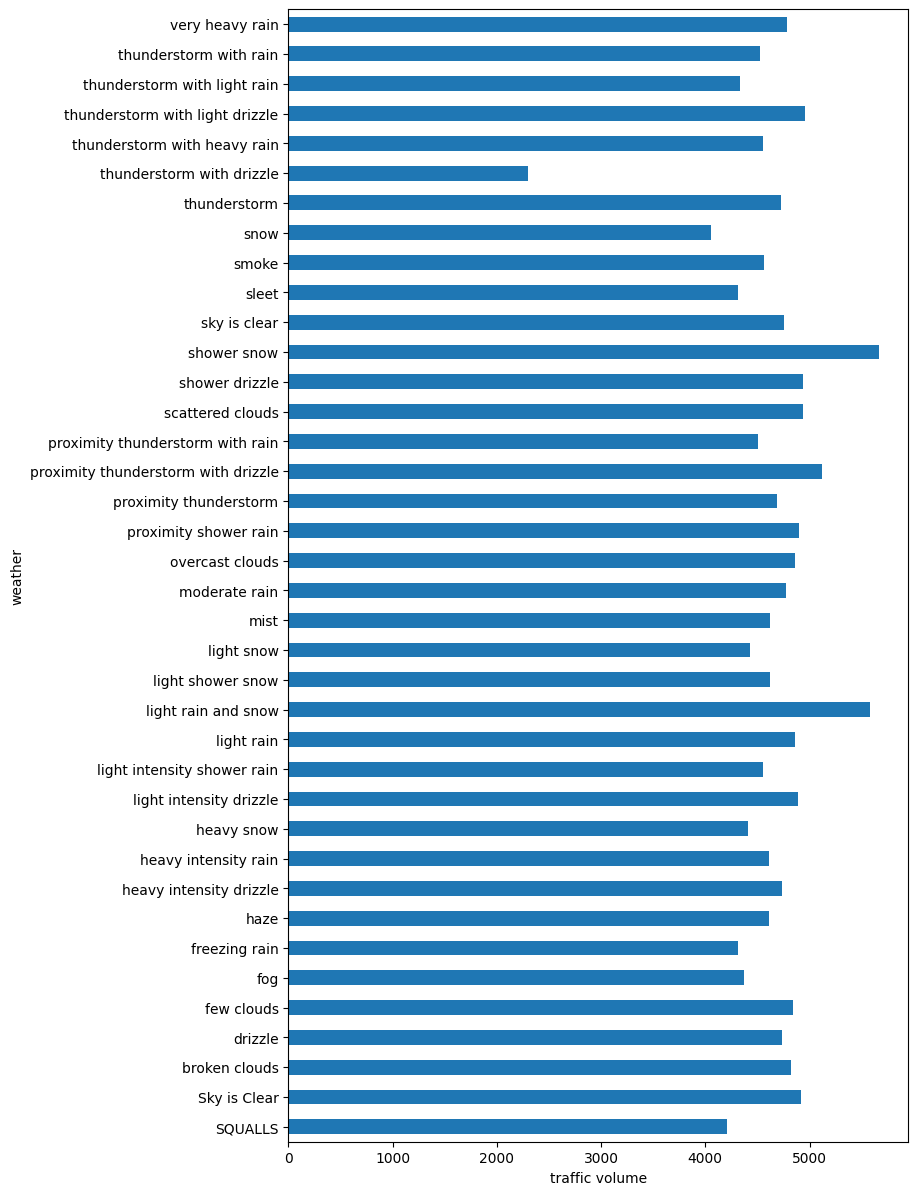

In [61]:
plt.figure(figsize=(8,15))
by_weather_description['traffic_volume'].plot.barh()
plt.xlabel('traffic volume')
plt.ylabel('weather')
plt.show()

### Observation
- Is there any traffic volume exceeding 5,000 cars?
    - Yes
- Can you find any weather type as a heavy traffic indicator?
    - Snow seems to make effect on a heavy traffic.